# Solution
1. Load the data file

In [4]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt   

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.formula.api as smf 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import SimpleImputer ,IterativeImputer

In [5]:
inp0= pd.read_csv('hour.csv')

In [6]:
inp0.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


2.Check for null values in the data and drop records with NAs.

In [12]:
inp0.isna().sum(axis=0)

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# Sanity checks:

1.Check if registered + casual = cnt for all the records. If not, the row is junk and should be dropped.

In [9]:
np.sum((inp0.casual + inp0.registered != inp0.cnt))

0

2.Month values should be 1-12 only

In [13]:
np.unique(inp0.mnth)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

3.Hour values should be 0-23

In [15]:
np.unique(inp0.hr)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

4.The variables ‘casual’ and ‘registered’ are redundant and need to be dropped. ‘Instant’ is the index and needs to be dropped too. The date column dteday will not be used in the model building, and therefore needs to be dropped. Create a new dataframe named inp1.

In [16]:
inp1= inp0.drop(['casual', 'registered', 'dteday', 'instant'], axis=1).copy()

In [25]:
inp1.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


5.Univariate analysis: 

Describe the numerical fields in the dataset using pandas describe method.

In [19]:
inp1.describe().round()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0,17379.0
mean,3.0,1.0,7.0,12.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,189.0
std,1.0,1.0,3.0,7.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,181.0
min,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
25%,2.0,0.0,4.0,6.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,40.0
50%,3.0,1.0,7.0,12.0,0.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,142.0
75%,3.0,1.0,10.0,18.0,0.0,5.0,1.0,2.0,1.0,1.0,1.0,0.0,281.0
max,4.0,1.0,12.0,23.0,1.0,6.0,1.0,4.0,1.0,1.0,1.0,1.0,977.0


Make density plot for temp. This would give a sense of the centrality and the spread of the distribution.

<AxesSubplot:ylabel='Density'>

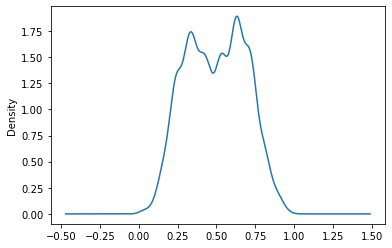

In [20]:
inp1.temp.plot.density()

Boxplot for atemp

-Are there any outliers?

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='atemp'>

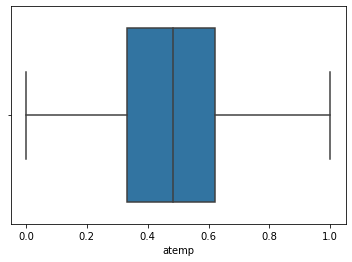

In [21]:
sns.boxplot(inp1.atemp)

there is no outlier for atemp

Histogram for hum

-Do you detect any abnormally high values?

<AxesSubplot:ylabel='Frequency'>

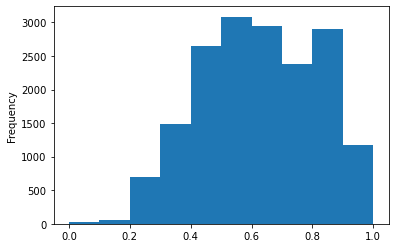

In [22]:
inp1.hum.plot.hist()

Not detecting abnormally high value

Density plot for windspeed

<AxesSubplot:ylabel='Density'>

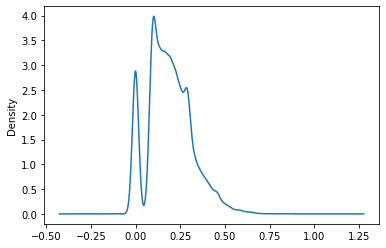

In [23]:
inp1.windspeed.plot.density()

Box and density plot for cnt – this is the variable of interest 

-Do you see any outliers in the boxplot? 

-Does the density plot provide a similar insight?

<AxesSubplot:ylabel='Density'>

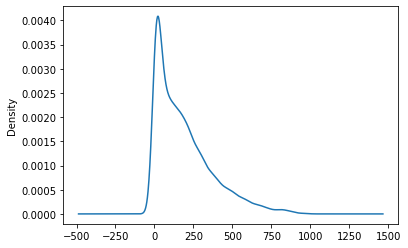

In [26]:
inp1.cnt.plot.density()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

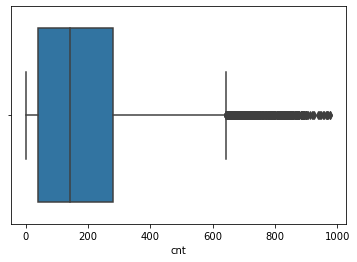

In [27]:
sns.boxplot(inp1.cnt)

Both plots are similar picture- outliers are present in cnt

# 6. Outlier treatment:

Cnt looks like some hours have rather high values. You’ll need to treat these outliers so that they don’t skew the analysis and the model. 

1.Find out the following percentiles: 10, 25, 50, 75, 90, 95, 99

2.Decide the cutoff percentile and drop records with values higher than the cutoff. Name the new dataframe as inp2.

In [28]:
inp1.cnt.quantile([0.1,0.25,0.5,0.75,0.9,0.95,0.99])

0.10      9.00
0.25     40.00
0.50    142.00
0.75    281.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: cnt, dtype: float64

563 is the 95th percentile – only 5% records have a value higher than this. Taking this as the cutoff.

In [29]:
inp2= inp1[inp1.cnt<563].copy()

In [64]:
inp2.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


7. Bivariate analysis

Make boxplot for cnt vs. hour

What kind of pattern do you see?

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hr', ylabel='cnt'>

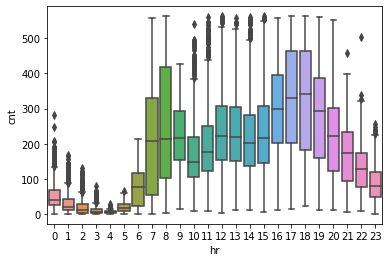

In [31]:
sns.boxplot('hr','cnt',data=inp2)

It’s evident that the peak hours are 5PM – 7PM, the hours 7-8AM also have high upper quartile. A hypothesis could be that a lot of people use the bikes for commute to workplace and back.

Make boxplot for cnt vs. weekday

Is there any difference in the rides by days of the week?

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 576x360 with 0 Axes>

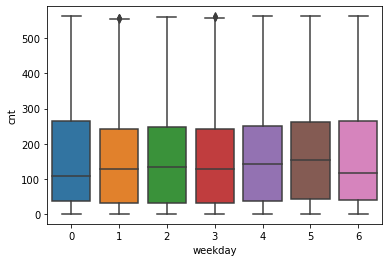

<Figure size 576x360 with 0 Axes>

In [33]:
sns.boxplot('weekday','cnt',data=inp2)
plt.figure(figsize=[8,5])

Make boxplot for cnt vs. month

Look at the median values. Any month(s) that stand out?

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mnth', ylabel='cnt'>

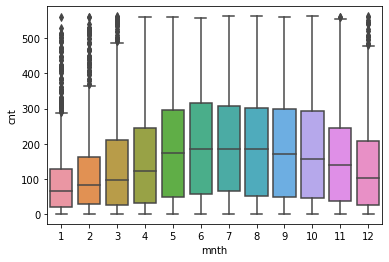

In [34]:
sns.boxplot(inp2.mnth,inp2.cnt)

Looks like end of winter/ early spring months have the least bike riding instances.

Make boxplot for cnt vs. season

Which season has the highest rides in general? Expected?

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='cnt'>

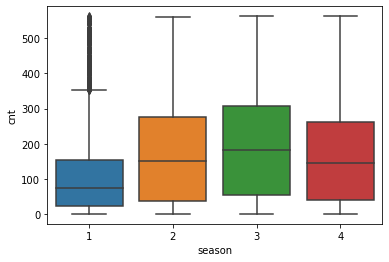

In [35]:
sns.boxplot(inp2.season,inp2.cnt)

season 3 has expected heighest ride

Make a bar plot with the median value of cnt for each hr

Does this paint a different picture from the box plot?

<BarContainer object of 16502 artists>

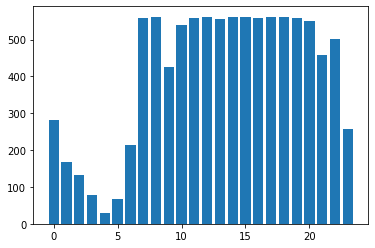

In [56]:
plt.bar(inp2.hr,inp2.cnt)

Paints a similar picture to the boxplot. Although the view is much cleaner and the pattern comes out much easier.

Make a correlation matrix for variables atemp, temp, hum, and windspeed

Which variables have the highest correlation?

In [58]:
inp2[['temp', 'atemp', 'hum', 'windspeed']].corr()

,temp,atemp,hum,windspeed
temp,1.000000,0.988218,-0.042603,-0.033209
atemp,0.988218,1.000000,-0.025747,-0.073985
hum,-0.042603,-0.025747,1.000000,-0.288648
windspeed,-0.033209,-0.073985,-0.288648,1.000000


atemp and temp are highly correlated variable

<AxesSubplot:>

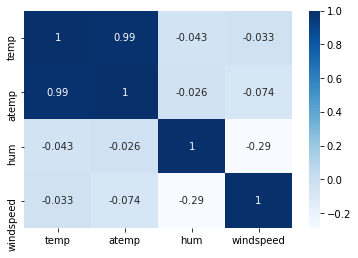

In [65]:
#heat map for correlation
sns.heatmap(inp2[['temp', 'atemp', 'hum', 'windspeed']].corr(),annot=True,cmap='Blues')

8. Data preprocessing

A few key considerations for the preprocessing: 

There are plenty of categorical features. Since these categorical features can’t be used in the predictive model, you need to convert to a suitable numerical representation. Instead of creating dozens of new dummy variables, try to club levels of categorical features wherever possible. For a feature with high number of categorical levels, you can club the values that are very similar in value for the target variable. 

Treating mnth column

For values 5,6,7,8,9,10, replace with a single value 5. This is because these have very similar values for cnt.

Get dummies for the updated 6 mnth values

In [73]:
inp3= inp2.copy()
inp3.mnth[inp3.mnth.isin([5,6,7,8,9])]=5


<ipython-input-73-90a24031a197>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.mnth[inp3.mnth.isin([5,6,7,8,9])]=5


In [74]:
np.unique(inp3.mnth)

array([ 1,  2,  3,  4,  5, 10, 11, 12], dtype=int64)

In [75]:
pd.get_dummies(inp3.mnth)

,1,2,3,4,5,10,11,12
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
17374,0,0,0,0,0,0,0,1
17375,0,0,0,0,0,0,0,1
17376,0,0,0,0,0,0,0,1
17377,0,0,0,0,0,0,0,1


Treating hr column

Create new mapping: 0-5: 0, 11-15: 11; other values are untouched. Again, the bucketing is done in a way that hr values with similar levels of cnt are treated the same.

In [77]:
inp3.hr[inp3.hr.isin([0,1,2,3,4,5])]=0
inp3.hr[inp3.hr.isin([11,12,13,14,15])]=11

<ipython-input-77-e9194979cc63>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.hr[inp3.hr.isin([0,1,2,3,4,5])]=0
<ipython-input-77-e9194979cc63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inp3.hr[inp3.hr.isin([11,12,13,14,15])]=11


In [78]:
np.unique(inp3.hr)

array([ 0,  6,  7,  8,  9, 10, 11, 16, 17, 18, 19, 20, 21, 22, 23],
      dtype=int64)

Get dummy columns for season, weathersit, weekday, mnth, and hr. You needn’t club these further as the levels seem to have different values for the median cnt, when seen from the box plots.

In [87]:
inp3 = pd.get_dummies(inp3,  drop_first=True)

In [88]:
inp3.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weathersit_4', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_6', 'hr_7', 'hr_8',
       'hr_9', 'hr_10', 'hr_11', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23'],
      dtype='object')

9.Train test split: Apply 70-30 split.

- call the new dataframes df_train and df_test

In [89]:
df_train, df_test = train_test_split(inp3, train_size = 0.7, random_state = 100)

10. Separate X and Y for df_train and df_test. For example, you should have X_train, y_train from df_train. y_train should be the cnt column from inp3 and X_train should be all other columns.

In [90]:
y_train = df_train.pop("cnt")
X_train = df_train

y_test = df_test.pop("cnt")
X_test = df_test


11.Model building

Use linear regression as the technique

Report the R2 on the train set

In [91]:
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

12.Make predictions on test set and report R2.

In [93]:
y_test_pred= lr.predict(X_test)
r2_score(y_test, y_test_pred)


0.6645500127041257